In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [75]:
train=pd.read_csv('train.csv',sep='|')
test=pd.read_csv('test.csv',sep='|')

In [76]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

In [77]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [78]:
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

Add tSNE/PCA Features

In [79]:
train_test_combined = pd.concat([train, test], ignore_index=True)

In [80]:
X_train_test_combined = train_test_combined.drop('fraud',axis=1)
Y_train_test_combined = train_test_combined['fraud']
print(X_train_test_combined.shape, Y_train_test_combined.shape)

(500000, 20) (500000,)


In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X_train_test_combined = pd.DataFrame(feature_scaler.fit_transform(X_train_test_combined.values), columns=X_train_test_combined.columns, index=X_train_test_combined.index)


In [82]:
from sklearn.decomposition import PCA

X_train_test_combined_PCA = X_train_test_combined.copy()

pca = PCA(n_components=7)
pca_result = pca.fit_transform(X_train_test_combined_PCA)

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.16124041 0.1559011  0.14737624 0.13509126 0.13197732 0.11312753
 0.11161208]
Cumulative explained variation for 7 principal components: 0.9563259397521083


In [83]:
train['pca_axis_1'] = X_train_test_combined_PCA['pca-one'].head(len(train))
train['pca_axis_2'] = X_train_test_combined_PCA['pca-two'].head(len(train))

In [84]:
X_train_test_combined_tSNE = X_train_test_combined.copy()
tsne_results = pd.read_pickle("tsneResult.pkl").values

In [85]:
X_train_test_combined_tSNE['tsne-one'] = tsne_results[:,0]
X_train_test_combined_tSNE['tsne-two'] = tsne_results[:,1]

In [86]:
X_train_test_combined_tSNE.head()

,grandTotal,lineItemVoids,lineItemVoidsPerEuro,lineItemVoidsPerPosition,lineItemVoidsPerSecond,pricePerScannedLineItem,quantityModifications,quantityModificationsPerEuro,quantityModificationsPerScannedLineItem,quantityModificationsPerSecond,scannedLineItems,scannedLineItemsPerSecond,scansWithoutRegistration,scansWithoutRegistrationPerEuro,scansWithoutRegistrationPerScannedLineItem,scansWithoutRegistrationPerSecond,secondsPerEuro,totalScanTimeInSeconds,trustLevel,valuePerSecond,tsne-one,tsne-two
0,0.547055,0.636364,0.000116,0.021944,0.000604,0.018864,0.6,0.000110,0.020690,0.000569,0.965517,0.000899,0.0,0.000000,0.000000,0.000000,0.000105,0.575410,0.8,0.000520,0.371124,2.065992
1,0.273627,0.454545,0.000166,0.032468,0.004209,0.019545,0.8,0.000292,0.057143,0.007407,0.448276,0.004303,0.2,0.000073,0.014286,0.001852,0.000022,0.058470,0.4,0.002541,1.413292,-0.542113
2,0.621662,0.272727,0.000044,0.020979,0.000180,0.047820,1.0,0.000161,0.076923,0.000660,0.413793,0.000268,1.0,0.000161,0.076923,0.000660,0.000133,0.827869,0.4,0.000411,2.043197,-0.529174
3,0.923192,0.727273,0.000079,0.025078,0.000406,0.031834,0.8,0.000087,0.027586,0.000447,0.965517,0.000522,0.4,0.000043,0.013793,0.000223,0.000106,0.978142,1.0,0.000517,1.375445,2.444786
4,0.815382,0.272727,0.000033,0.010101,0.000634,0.030199,0.4,0.000049,0.014815,0.000930,0.896552,0.002075,0.7,0.000086,0.025926,0.001628,0.000029,0.234426,0.8,0.001902,-0.579406,1.961413


In [87]:
train['tsne_axis_1'] = X_train_test_combined_tSNE['tsne-one'].head(len(train))
train['tsne_axis_2'] = X_train_test_combined_tSNE['tsne-two'].head(len(train))

In [88]:
train.head(10)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,pca_axis_1,pca_axis_2,tsne_axis_1,tsne_axis_2
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845,-0.106133,0.278145,0.371124,2.065992
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199,0.243599,-0.108150,1.413292,-0.542113
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438,0.502515,-0.100077,2.043197,-0.529174
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332,0.122039,0.480733,1.375445,2.444786
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531,-0.226498,0.289921,-0.579406,1.961413
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1,26.0,0.426538,0.192308,0.076923,0.014286,0.006494,0.002597,69.431921,0.991885,0.450857,0.180343,-0.212661,-0.509492,-0.656204,-2.447449
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0,11.0,5.057273,0.636364,0.090909,0.006803,0.023810,0.003401,5.284918,0.035952,0.125831,0.017976,-0.241190,-0.091522,-1.573847,-0.438576
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0,10.0,2.280000,0.800000,0.400000,0.000000,0.005178,0.002589,67.763158,0.000000,0.350877,0.175439,0.310786,-0.297834,1.287310,-1.474801
8,6,962,65.44,7,0,2,0.028067,0.068025,0.259259,0,27.0,2.423704,0.000000,0.074074,0.007277,0.000000,0.002079,14.700489,0.106968,0.000000,0.030562,-0.263363,0.482789,-0.620175,2.505669
9,2,725,41.08,10,2,4,0.037241,0.056662,0.370370,0,27.0,1.521481,0.074074,0.148148,0.013793,0.002759,0.005517,17.648491,0.243427,0.048685,0.097371,0.124496,-0.319390,1.443362,-1.942744


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [90]:
def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score

#### Basic XGBoost Implementation with train/test split

In [91]:
#import scipy.sparse
from sklearn.model_selection import train_test_split

X = train.drop('fraud', axis=1)
y = train.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [92]:
from xgboost import XGBClassifier


predictors = [x for x in X.columns]
clf = XGBClassifier(objective="binary:logistic",
                    random_state=42,
                    max_depth=5,
                    min_child_weight= 1,
                    gamma = 0,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    scale_pos_weight = 1,
                    n_jobs = 4
                   )

#modelfit(clf, train, predictors)

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
get_monetary_value(cm)


True negative:  440
False positive:  2
False negative:  8
True positive:  20
10 for 470 instances in the test set
0.02127659574468085 per instance in the test set


10

In [93]:
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 4,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 0.8}

# Model tuning

In [174]:
from xgboost import XGBClassifier

paramset = dict(objective = ['binary:logistic'],
                eval_metric = ['error'],
                base_score = [0.3, 0.5, 0.7],
                learning_rate = [0.01, 0.1, 0.2, 0.3],
                max_depth = range(3,7),
                min_child_weight = range(1,6),
                #gamma = [i/10.0 for i in range(0,4)],
                n_estimators = [100, 200, 300, 400, 500],
                random_state = [42],
                n_jobs = [-1],
                max_delta_step = range(0,7) #usually not needed, might help because class is extremely imbalanced)
               )

In [175]:
#less parameters (most important ones) for faster search
paramset1 = dict(objective = ['binary:logistic'],
                eval_metric = ['error'],
                learning_rate = [0.1],
                n_estimators = [140],
                max_depth = range(3,10,2),
                min_child_weight = range(1,6,2))

#### Grid Search

In [176]:
from sklearn.model_selection import GridSearchCV

model_tuning_factory = [
    GridSearchCV(estimator = XGBClassifier(),
                     param_grid = paramset,
                     cv = skf,
                     scoring = my_custom_score,
                     n_jobs = -1)
]

#### Random Search

In [177]:
from sklearn.model_selection import RandomizedSearchCV

iterations = 5                 
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(XGBClassifier(),
                 paramset,
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations)
]

In [178]:
Y = train['fraud']
X = train.drop('fraud',axis=1)

In [179]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])
X_scaled = X   
data_preparation = "No Scaling"


######### TODO: Feature Importance xgboost: get_fscore()
for model in model_tuning_factory:   # replace with model_tuning_factory_randomized for faster results


    for feature_count in range(1,len(list(X))+1):
        
        model.seed = 42
        start_time = time.time()              


        # Solution with SelectKBest
        best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
        best_feature_list = X.columns[best_features.get_support()]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]

        result_table = result_table.append({
         "Model": model_name, 
         "Data Preparation": data_preparation,   
         "Feature Count": feature_count,
         "Feature Selection Technique": "SelectKBest",   
         "Features": best_feature_list.values, 
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,   
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


        # Solution with Recursive Feature Elimination -> only works for some models

        if (model.estimator.__class__.__name__ == 'LogisticRegression'
         or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
         or model.estimator.__class__.__name__ == 'RandomForestClassifier'
         or model.estimator.__class__.__name__ == 'BernoulliNB'
         or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
         or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
         or model.estimator.__class__.__name__ == 'Perceptron'
         or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
         or model.estimator.__class__.__name__ == 'XGBClassifier'):

           # Traditional RFE
            rfe = RFE(model.estimator, n_features_to_select = feature_count)
            rfe = rfe.fit(X,Y)
            best_feature_list = np.array(list(X))[np.array(rfe.support_)]
            X_selected_features = X[best_feature_list]

            model.fit(X_selected_features,Y)  
            model_name = model.best_estimator_.__class__.__name__
            score_mean = model.cv_results_['mean_test_score'][model.best_index_]
            score_std = model.cv_results_['std_test_score'][model.best_index_]


            result_table = result_table.append({
             "Model": model_name, 
             "Data Preparation": data_preparation,
             "Feature Count": feature_count,
             "Feature Selection Technique": "RFE",
             "Features": best_feature_list,
             "Optimal Parameters": model.best_params_,
             "Monetary Value Per Instance - Mean":  score_mean,
             "Monetary Value Per Instance - Standard Deviation": score_std,  
             "Raw Model": model.best_estimator_
              }, ignore_index=True)

        end_time = time.time()

        print("Finished " + model.best_estimator_.__class__.__name__ + " with " + data_preparation + " and " + str(feature_count) + " features after " + str(round(end_time - start_time, 2)) + " seconds")



    if (model.estimator.__class__.__name__ == 'LogisticRegression'
     or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
     or model.estimator.__class__.__name__ == 'RandomForestClassifier'
     or model.estimator.__class__.__name__ == 'BernoulliNB'
     or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
     or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
     or model.estimator.__class__.__name__ == 'Perceptron'
     or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
     or model.estimator.__class__.__name__ == 'XGBClassifier'):

        # RFE with Cross Validation -> determines the optimum feature count automatically
        rfecv = RFECV(model.estimator, cv = skf, scoring = my_custom_score)
        rfecv = rfe.fit(X,Y)
        best_feature_list = np.array(list(X))[np.array(rfecv.support_)]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]


        result_table = result_table.append({
         "Model": model_name,  
         "Data Preparation": data_preparation,
         "Feature Count": len(best_feature_list),
         "Feature Selection Technique": "RFECV",
         "Features": best_feature_list,
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,    
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Finished XGBClassifier with No Scaling and 1 features after 33.39 seconds


KeyboardInterrupt: 

In [50]:
result_table.shape

(25, 9)

In [51]:
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
9,XGBClassifier,No Scaling,9,RFE,"[totalScanTimeInSeconds, lineItemVoids, scansW...","{'random_state': 42, 'objective': 'binary:logi...",0.154337,0.096457,"XGBClassifier(base_score=0.7, booster='gbtree'..."
24,XGBClassifier,No Scaling,23,RFECV,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'random_state': 42, 'objective': 'binary:logi...",0.151676,0.112608,"XGBClassifier(base_score=0.7, booster='gbtree'..."
15,XGBClassifier,No Scaling,15,RFE,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'random_state': 42, 'objective': 'binary:logi...",0.149015,0.089899,"XGBClassifier(base_score=0.3, booster='gbtree'..."
11,XGBClassifier,No Scaling,11,RFE,"[totalScanTimeInSeconds, lineItemVoids, scansW...","{'random_state': 42, 'objective': 'binary:logi...",0.143693,0.113070,"XGBClassifier(base_score=0.7, booster='gbtree'..."
10,XGBClassifier,No Scaling,11,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scansWith...","{'random_state': 42, 'objective': 'binary:logi...",0.143693,0.115559,"XGBClassifier(base_score=0.3, booster='gbtree'..."
20,XGBClassifier,No Scaling,21,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'random_state': 42, 'objective': 'binary:logi...",0.141032,0.107112,"XGBClassifier(base_score=0.3, booster='gbtree'..."
23,XGBClassifier,No Scaling,23,RFE,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'random_state': 42, 'objective': 'binary:logi...",0.135710,0.083595,"XGBClassifier(base_score=0.7, booster='gbtree'..."
19,XGBClassifier,No Scaling,19,RFE,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'random_state': 42, 'objective': 'binary:logi...",0.133049,0.102993,"XGBClassifier(base_score=0.5, booster='gbtree'..."
16,XGBClassifier,No Scaling,17,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'random_state': 42, 'objective': 'binary:logi...",0.133049,0.095945,"XGBClassifier(base_score=0.7, booster='gbtree'..."
14,XGBClassifier,No Scaling,15,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'random_state': 42, 'objective': 'binary:logi...",0.133049,0.095837,"XGBClassifier(base_score=0.7, booster='gbtree'..."


In [52]:
result_table.to_pickle("result_table_xgb_classifier_indepth3.pkl")
# result_table = pd.read_pickle("result_table_Decision_Tree.pkl")

Text(0, 0.5, 'Monetary Value Per Instance - Mean')

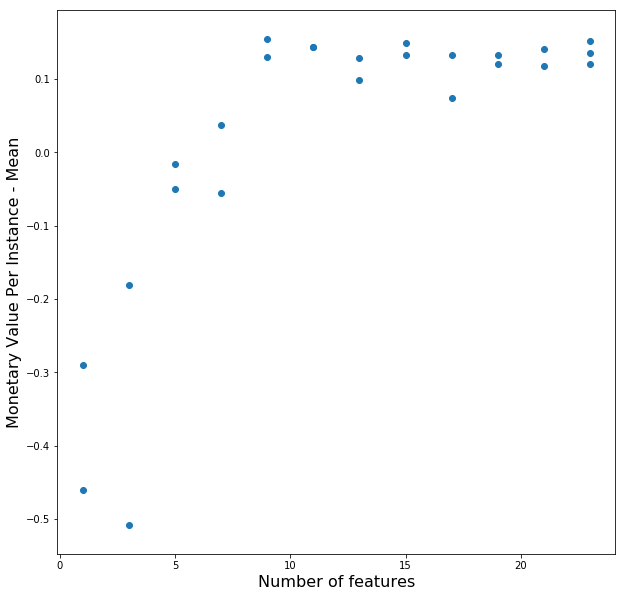

In [53]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(result_table["Feature Count"], result_table["Monetary Value Per Instance - Mean"])
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [54]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Features"]
best_parameters = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"]

print(best_model)
print(best_model_features)
print(best_parameters)

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0.3,
       learning_rate=0.05, max_delta_step=3, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=500, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
['totalScanTimeInSeconds' 'lineItemVoids' 'scansWithoutRegistration'
 'valuePerSecond' 'scannedLineItems'
 'scansWithoutRegistrationPerScannedLineItem' 'pca_axis_1' 'pca_axis_2'
 'tsne_axis_2']
{'random_state': 42, 'objective': 'binary:logistic', 'n_jobs': -1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 2, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'eval_metric': 'error', 'base_score': 0.7}


In [43]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm)

True negative:  1775
False positive:  0
False negative:  0
True positive:  104
520 for 1879 instances in the test set
0.2767429483767962 per instance in the test set
